In [1]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
import re
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from matplotlib import pyplot as plt
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE
from kaggle_datasets import KaggleDatasets


Tensorflow version 2.12.0


In [3]:

try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
    strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
    #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines

print("Number of accelerators: ", strategy.num_replicas_in_sync)


Number of accelerators:  1


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential, Model
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras import layers, models
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [6]:
!pip install Pillow

In [5]:
import PIL.Image as Image

In [6]:
from keras.preprocessing import image

In [7]:
import pathlib
data_path = "/kaggle/input/new-plant-diseases-dataset/"

train_path =  "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
#train_path = pathlib.Path(train_path)
valid_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
#valid_path= pathlib.Path(valid_path)
test_path = "/kaggle/input/new-plant-diseases-dataset/test"
#test_path= pathlib.Path(test_path)

In [8]:
""""base_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)"
train_data = os.path.join(base_dir,"train")
#test_path= os.path.join(base_dir,"valid")"""

'"base_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)"\ntrain_data = os.path.join(base_dir,"train")\n#test_path= os.path.join(base_dir,"valid")'

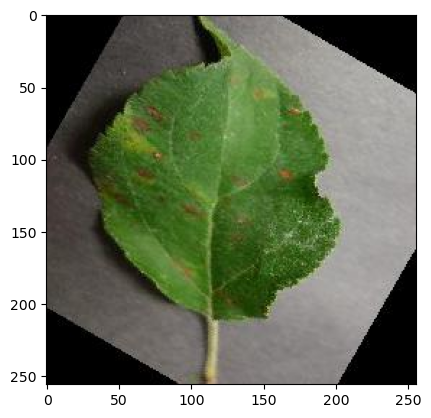

In [9]:
import matplotlib.image as Mimg
img = Mimg.imread('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/0321e067-d13b-47d0-b3a6-76ba6f357d02___FREC_C.Rust 3667_new30degFlipLR.JPG')
plt.imshow(img)
plt.show()

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/new-plant-diseases-dataset",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)


Found 175767 files belonging to 3 classes.


In [11]:
from PIL import Image
image = Image.open('/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)/00c247e8-48d2-4a56-a9f3-4eacfb4d85be___FAM_B.Msls 4197.JPG')
 
print(image.format)
print(image.size)
print(image.mode)

JPEG
(256, 256)
RGB


In [12]:
data_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)"
import pathlib
data_dir = pathlib.Path(data_dir)

In [13]:
filepaths = list(data_dir.glob(r'**/*.JPG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))


filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe = pd.concat([filepaths, labels], axis=1)

In [14]:
dataframe

Filepath  \
0      /kaggle/input/new-plant-diseases-dataset/New P...   
1      /kaggle/input/new-plant-diseases-dataset/New P...   
2      /kaggle/input/new-plant-diseases-dataset/New P...   
3      /kaggle/input/new-plant-diseases-dataset/New P...   
4      /kaggle/input/new-plant-diseases-dataset/New P...   
...                                                  ...   
84816  /kaggle/input/new-plant-diseases-dataset/New P...   
84817  /kaggle/input/new-plant-diseases-dataset/New P...   
84818  /kaggle/input/new-plant-diseases-dataset/New P...   
84819  /kaggle/input/new-plant-diseases-dataset/New P...   
84820  /kaggle/input/new-plant-diseases-dataset/New P...   

                        Label  
0        Tomato___Late_blight  
1        Tomato___Late_blight  
2        Tomato___Late_blight  
3        Tomato___Late_blight  
4        Tomato___Late_blight  
...                       ...  
84816  Corn_(maize)___healthy  
84817  Corn_(maize)___healthy  
84818  Corn_(maize)___healthy  
84819  Corn_(maize)___healthy  
84820  Corn_(maize)___healthy  

[84821 rows x 2 columns]

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
import pathlib
test_data = pathlib.Path("/kaggle/input/new-plant-diseases-dataset/test")

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.08)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_path,
                                               target_size = (256,256),
                                               batch_size = 32,
                                               shuffle = True,
                                               class_mode = "categorical",
                                             subset='training')

valid_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = (256,256),
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    class_mode = "categorical",
                                                    subset='validation')

test_generator = validation_datagen.flow_from_directory(valid_path,
                                                        batch_size=32,
                                                        shuffle = False,
                                                        class_mode='categorical',
                                                        target_size=(256,256))

Found 64689 images belonging to 38 classes.
Found 5606 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


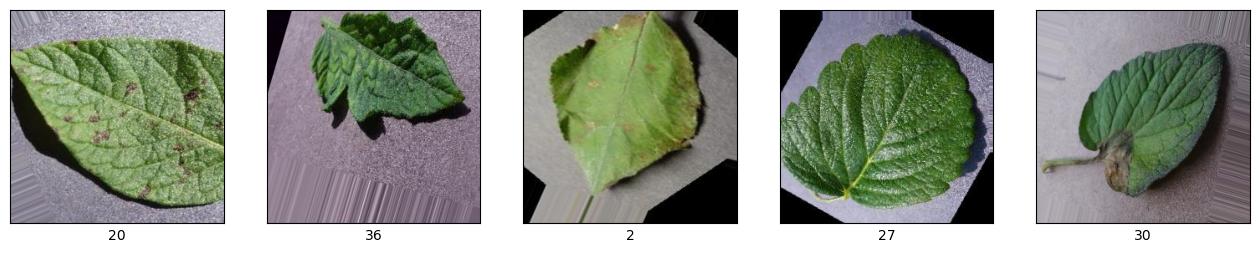

In [18]:
from tensorflow.keras.preprocessing import image
sample_x, sample_y = next(train_generator)
plt.figure(figsize=(16,9))
for i in range(5):
    plt.subplot(1,5,i+1)
    img = image.img_to_array(sample_x[i])
    plt.imshow(img)
    plt.xlabel(np.argmax(sample_y[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [19]:
print(train_generator.class_indices)
#print(valid_generator.class_indices)
#print(test_generator.class_indices)


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [20]:
print(train_generator.class_indices)
#print(valid_generator.class_indices)
#print(test_generator.class_indices)


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [21]:
import tensorflow
base_model =tensorflow.keras.applications.ResNet152V2(input_shape=(256,256,3), weights='imagenet', include_top=False)

234545216/234545216 [==============================] - 8s 0us/step


In [22]:
base_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

In [23]:
base_model.trainable=False
# Freeze four convolution blocks
for layer in base_model.layers[557:]:
    layer.trainable = True
# Make sure you have frozen the correct layers
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [24]:

flatten_layer = Flatten()(base_model.output)

prediction_layer =layers.Dense(38, activation='softmax')(flatten_layer)

model = Model(inputs=base_model.input, outputs=prediction_layer)

In [25]:
Adam = tf.keras.optimizers.Adam(
    learning_rate=0.00001,)

In [26]:
model.compile(optimizer = Adam , loss = "categorical_crossentropy", metrics = ['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience= 2,factor=0.2, verbose=1)
es = EarlyStopping(monitor='val_accuracy', mode='auto', patience=3,  restore_best_weights=True)
mc = ModelCheckpoint('ResNet152V2_model.h5' , save_weights_only=True, save_best_only=True, verbose=1)
callback = [es,mc,red_lr]

history = model.fit_generator (train_generator,  epochs=10, validation_data=valid_generator, callbacks= callback)

Epoch 1/10
2022/2022 [==============================] - ETA: 0s - loss: 0.9690 - accuracy: 0.7225
Epoch 1: val_loss improved from inf to 0.43126, saving model to ResNet152V2_model.h5
2022/2022 [==============================] - 1384s 676ms/step - loss: 0.9690 - accuracy: 0.7225 - val_loss: 0.4313 - val_accuracy: 0.8628 - lr: 1.0000e-05
Epoch 2/10
2022/2022 [==============================] - ETA: 0s - loss: 0.3385 - accuracy: 0.8913
Epoch 2: val_loss improved from 0.43126 to 0.29165, saving model to ResNet152V2_model.h5
2022/2022 [==============================] - 1085s 537ms/step - loss: 0.3385 - accuracy: 0.8913 - val_loss: 0.2917 - val_accuracy: 0.9065 - lr: 1.0000e-05
Epoch 3/10
2022/2022 [==============================] - ETA: 0s - loss: 0.2361 - accuracy: 0.9232
Epoch 3: val_loss improved from 0.29165 to 0.22866, saving model to ResNet152V2_model.h5
2022/2022 [==============================] - 1070s 529ms/step - loss: 0.2361 - accuracy: 0.9232 - val_loss: 0.2287 - val_accuracy: 0.

In [28]:
model.history

In [29]:
history.history['val_accuracy']

[0.8628255724906921,
 0.9065287113189697,
 0.9241883754730225,
 0.9389939308166504,
 0.9443453550338745,
 0.9482697248458862,
 0.9514805674552917,
 0.9534427523612976,
 0.9584373831748962,
 0.9616482257843018]

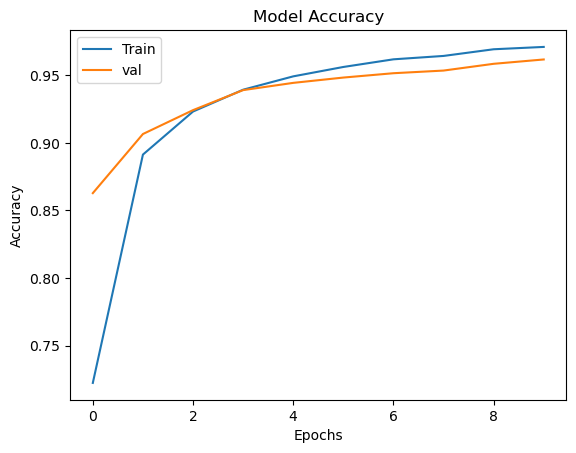

In [30]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

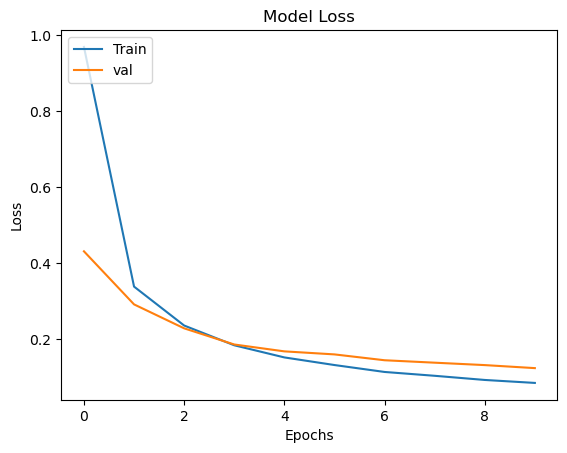

In [31]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [33]:
from tensorflow.keras.models import load_model

model.save('plant_disease_ResNet152V2.h5')

In [34]:
import pickle
pickle.dump(model,open('plant_disease_ResNet152V2.pkl','wb'))

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained model
model = tf.keras.models.load_model('/kaggle/working/plant_disease_ResNet152V2.h5')

In [36]:
scores = model.evaluate(test_generator)

550/550 [==============================] - 136s 243ms/step - loss: 0.0677 - accuracy: 0.9762


# Test accuracy is 97.74 %

In [37]:
y_pred = model.predict(test_generator)

550/550 [==============================] - 89s 158ms/step


In [38]:
L = [  'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',  'Tomato___healthy']

In [39]:
img='/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'

In [40]:
import cv2

In [41]:
def predict_disease(test_image):
    img = cv2.imread(test_image)
    img = img / 255.0
    img = cv2.resize(img, (256, 256))
    img = img.reshape(1,256,256,3)
    prediction = model.predict(img)
    pred_class = np.argmax(prediction, axis = -1)
    return pred_class

In [42]:
pred=predict_disease(img)
d=pred[0]

1/1 [==============================] - 3s 3s/step


In [43]:
L[d]

'Apple___Cedar_apple_rust'

1/1 [==============================] - 0s 30ms/step


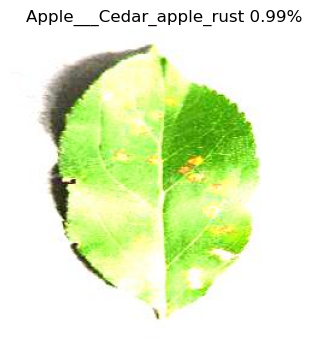

1/1 [==============================] - 0s 32ms/step


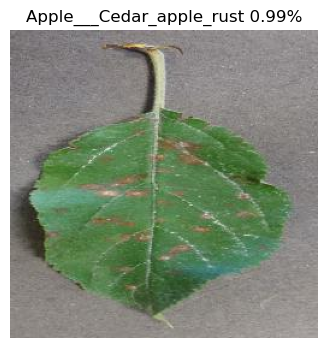

1/1 [==============================] - 0s 31ms/step


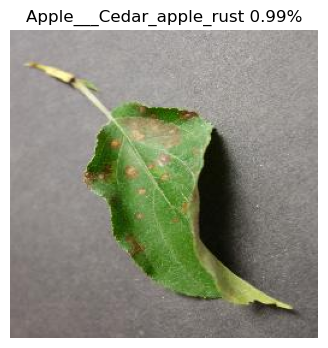

1/1 [==============================] - 0s 30ms/step


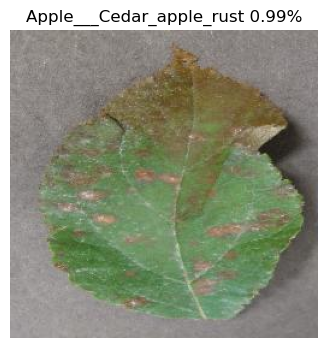

1/1 [==============================] - 0s 30ms/step


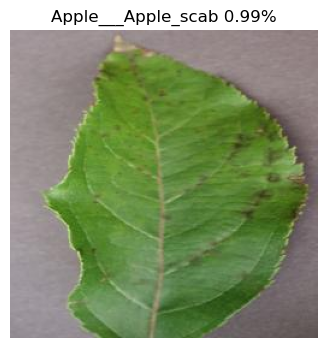

1/1 [==============================] - 0s 30ms/step


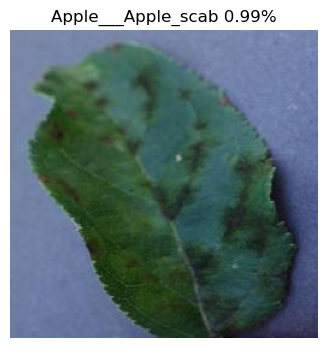

1/1 [==============================] - 0s 33ms/step


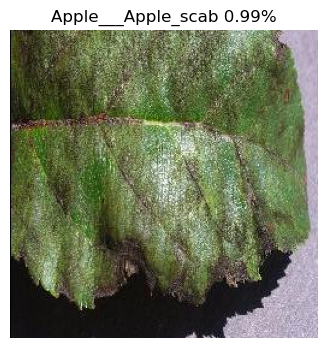

1/1 [==============================] - 0s 31ms/step


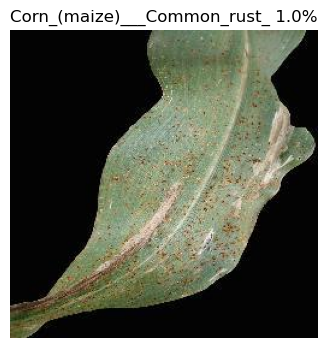

1/1 [==============================] - 0s 29ms/step


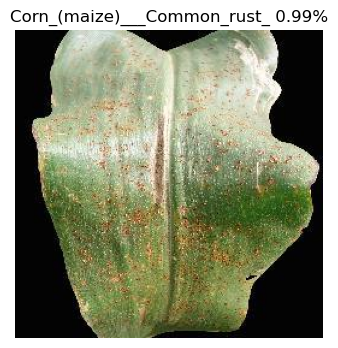

1/1 [==============================] - 0s 30ms/step


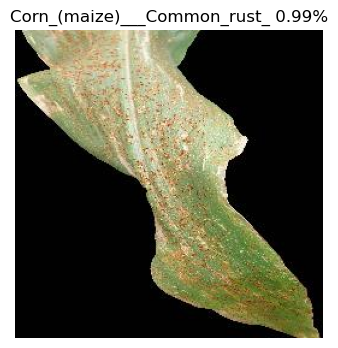

1/1 [==============================] - 0s 31ms/step


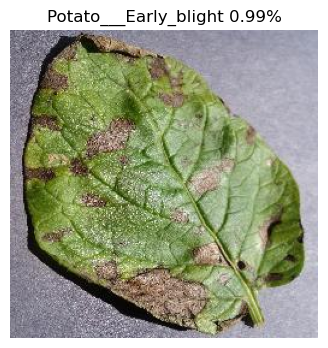

1/1 [==============================] - 0s 30ms/step


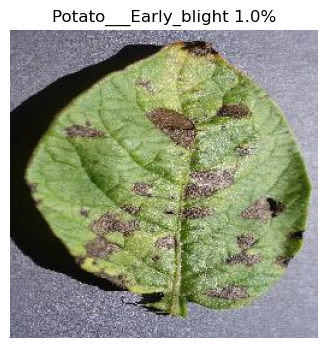

1/1 [==============================] - 0s 30ms/step


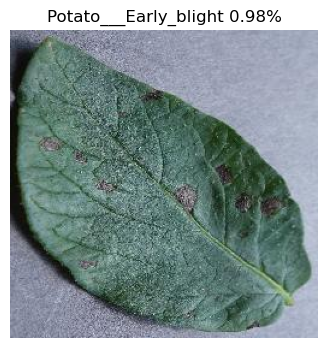

1/1 [==============================] - 0s 30ms/step


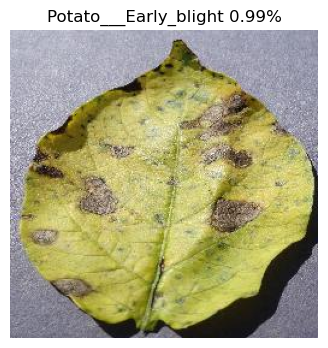

1/1 [==============================] - 0s 30ms/step


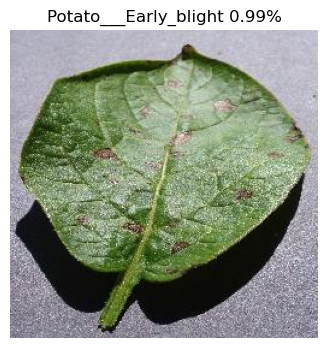

1/1 [==============================] - 0s 30ms/step


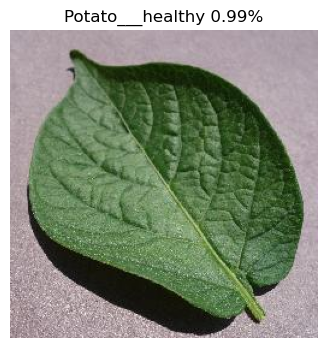

1/1 [==============================] - 0s 30ms/step


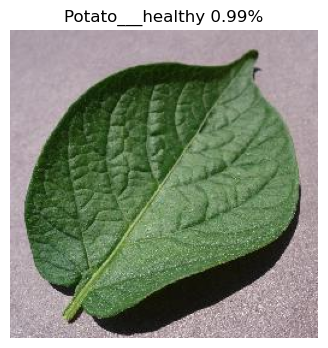

1/1 [==============================] - 0s 30ms/step


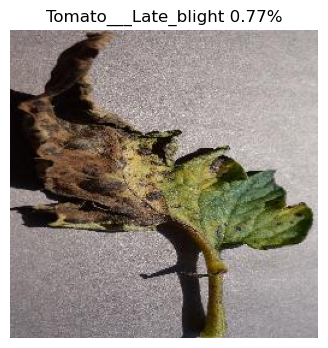

1/1 [==============================] - 0s 31ms/step


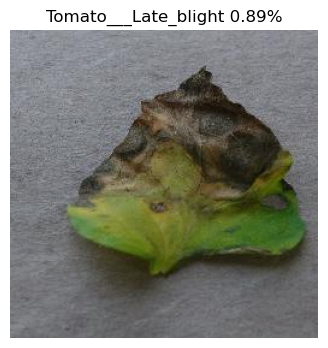

1/1 [==============================] - 0s 30ms/step


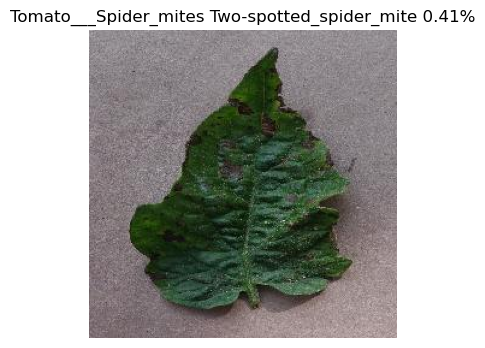

1/1 [==============================] - 0s 30ms/step


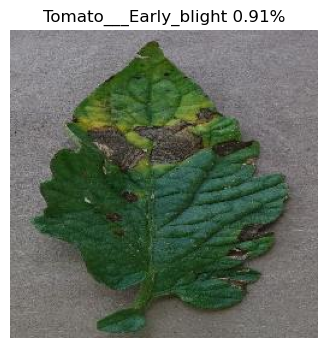

1/1 [==============================] - 0s 30ms/step


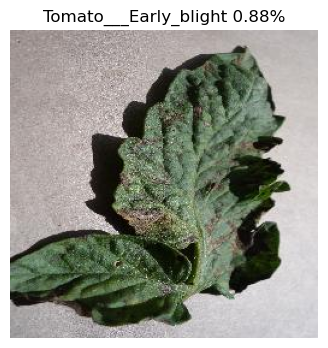

1/1 [==============================] - 0s 30ms/step


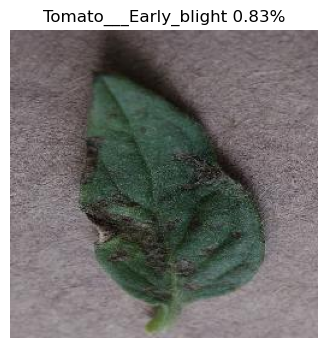

1/1 [==============================] - 0s 30ms/step


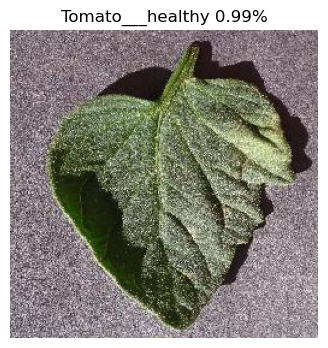

1/1 [==============================] - 0s 29ms/step


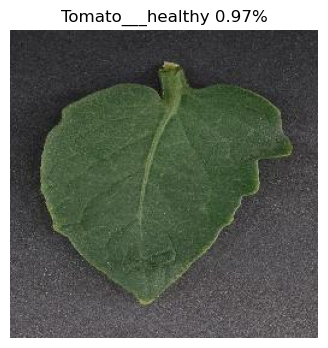

1/1 [==============================] - 0s 30ms/step


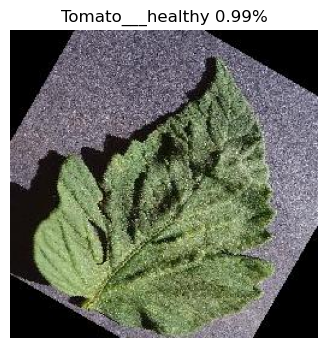

1/1 [==============================] - 0s 29ms/step


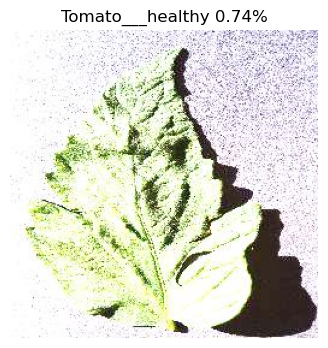

1/1 [==============================] - 0s 29ms/step


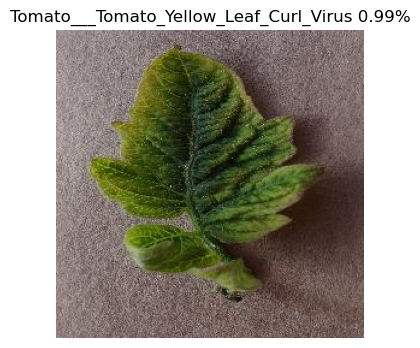

1/1 [==============================] - 0s 29ms/step


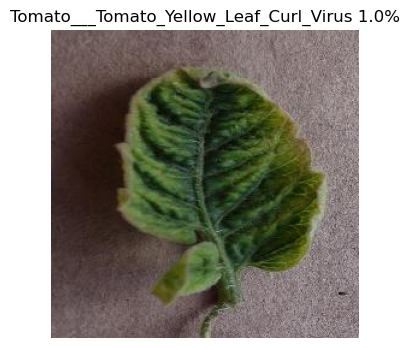

1/1 [==============================] - 0s 30ms/step


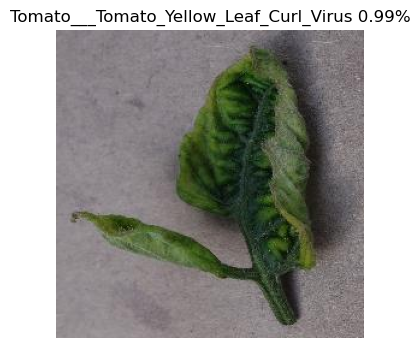

1/1 [==============================] - 0s 29ms/step


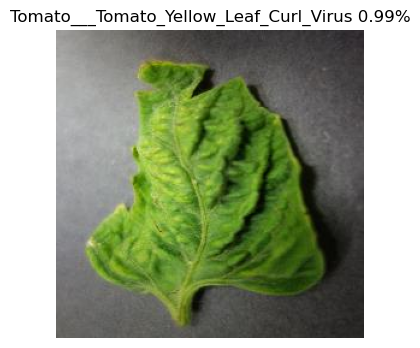

1/1 [==============================] - 0s 30ms/step


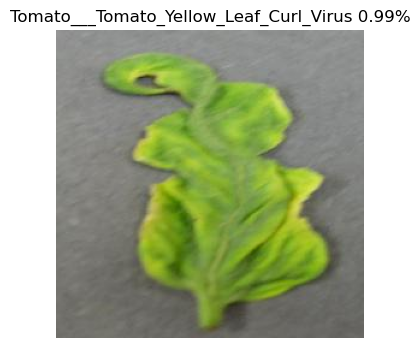

1/1 [==============================] - 0s 30ms/step


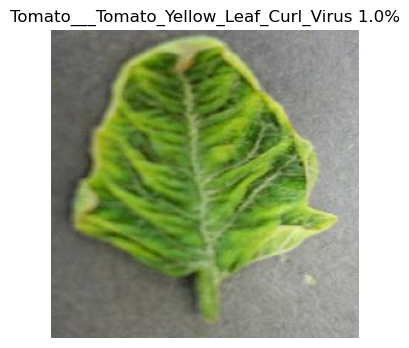

In [44]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
directory="/kaggle/input/new-plant-diseases-dataset/test/test"
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(0,33):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(256, 256))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = L[index]
    #ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()